In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Furniture.csv')
df

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


In [3]:
print(df.isnull().sum())


price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
revenue                0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

## Data Loading and Feature Creation
The dataset is loaded and three new features are created:
profit: Difference between revenue and cost.
price_per_sale: The price of a single unit sale.
revenue_per_unit: Revenue generated per unit sold.

In [5]:
# Create new features
df['profit'] = df['revenue'] - df['cost']
df['price_per_sale'] = df['price'] / df['sales']
df['revenue_per_unit'] = df['revenue'] / df['sales']

# Inspect the new features
print(df[['profit', 'price_per_sale', 'revenue_per_unit']].head())


         profit  price_per_sale  revenue_per_unit
0   3767.554307        5.463576         98.729131
1  -3906.036085       68.260205       -503.000323
2  14008.823453       11.856165        446.423757
3  11979.232369        6.654090        255.439035
4  -4657.999415        6.326757       -241.487144


## Histogram for Numerical Columns
Histograms are generated for key numerical columns. This helps visualize the distribution of variables like price, cost, sales, profit, and more.

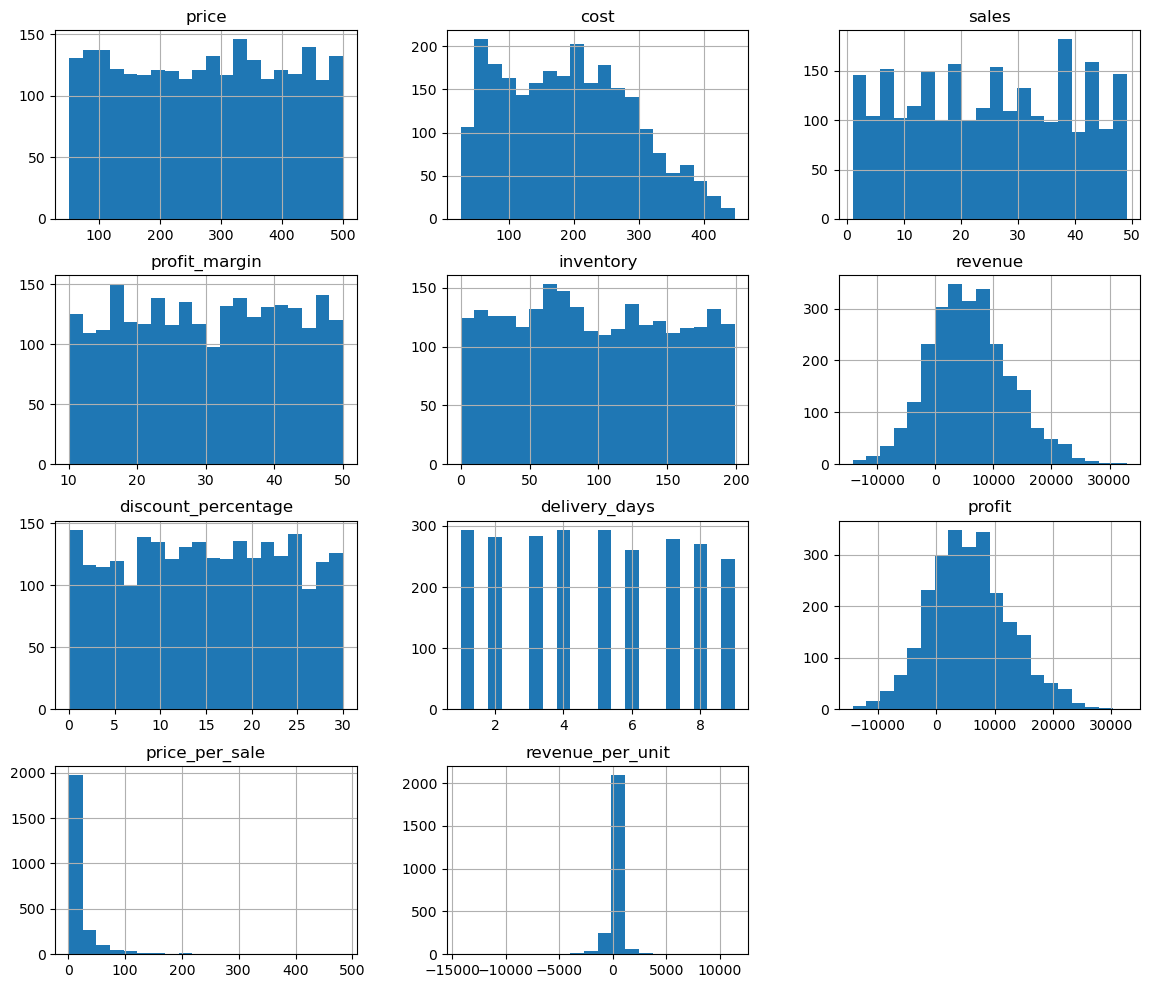

In [6]:
# histogram for numerical columns 
df[['price','cost','sales','profit_margin','inventory','revenue','discount_percentage','delivery_days',
    'profit','price_per_sale','revenue_per_unit']].hist(bins=20, figsize=(14,12))
plt.show()

 ## Plotting for Specific Categorical Columns:
 This line of code calls the plot_categorical function to create count plots for the following categorical columns:
category: Furniture categories (e.g., chairs, tables, etc.).
material: Types of materials used (e.g., wood, metal).
color: Available colors for the items.
location: Store or warehouse locations.
season: Seasonal information related to sales.
store_type: Type of store (e.g., retail, online).
brand: Different furniture brands.

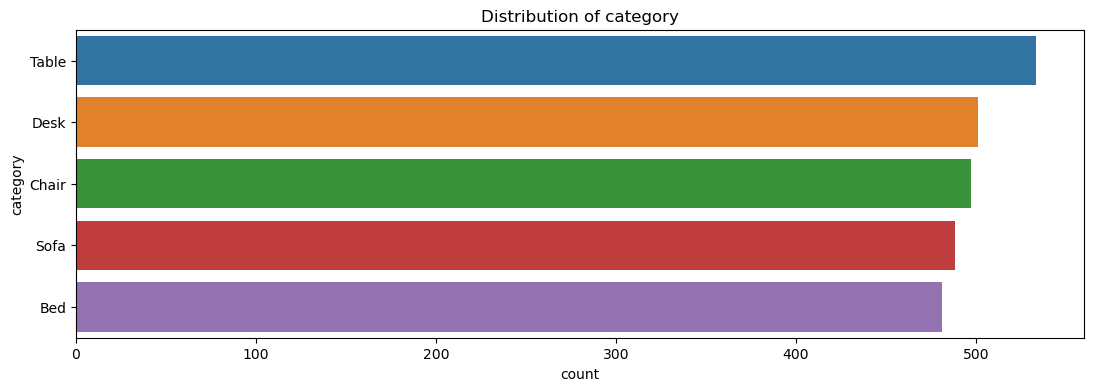

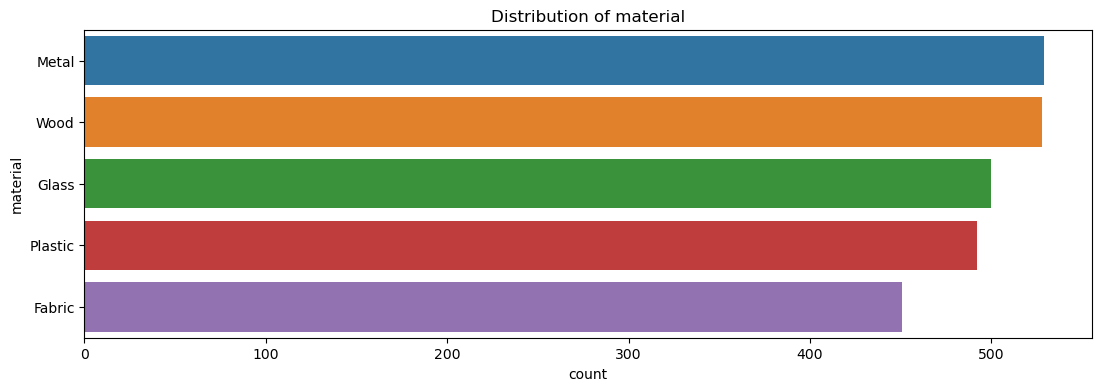

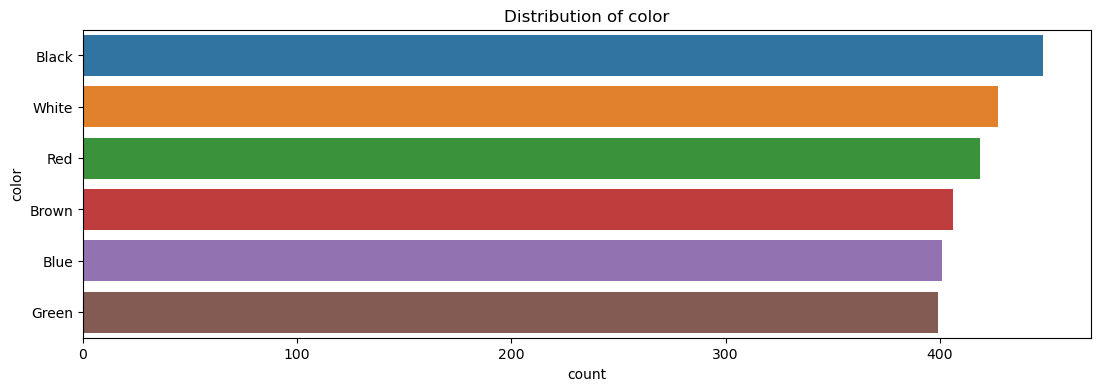

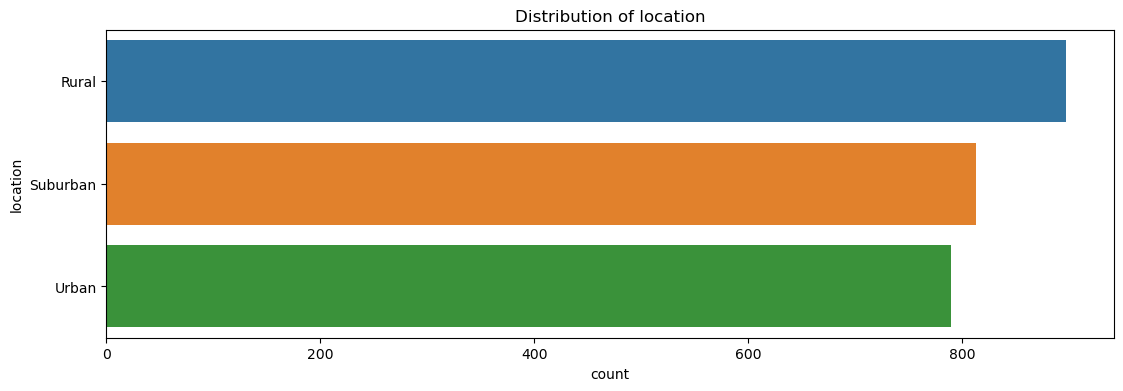

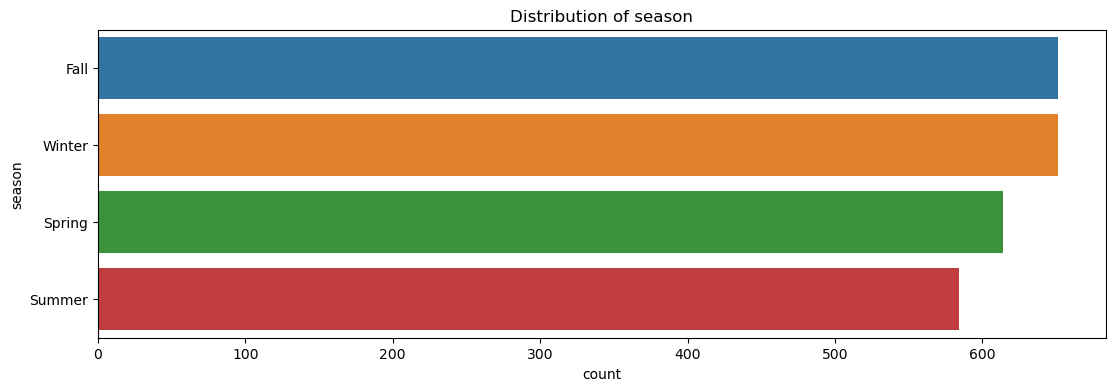

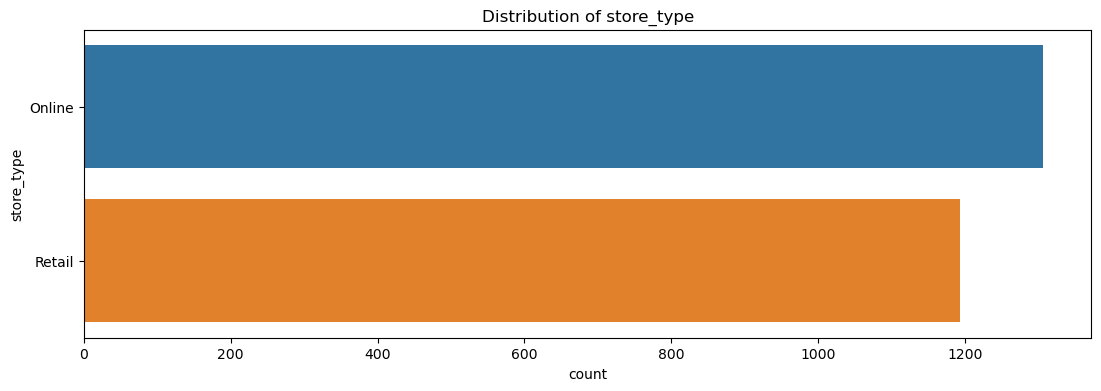

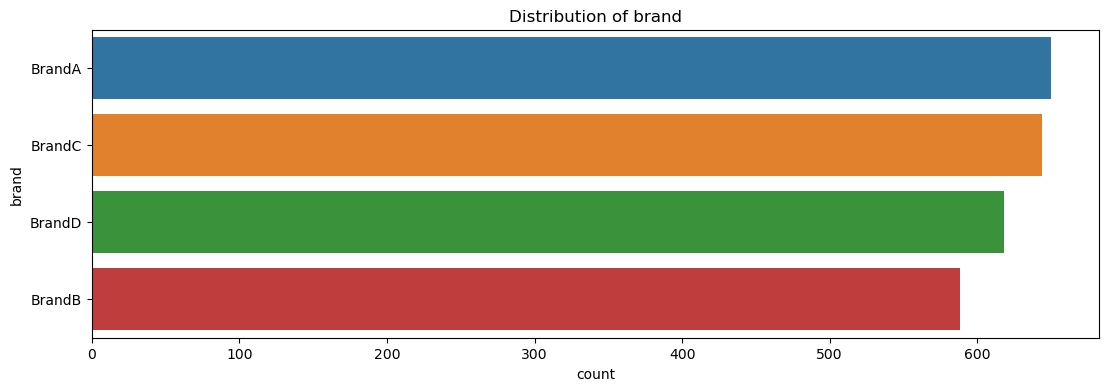

In [7]:
def plot_categorical(df, cols):
    for col in cols:
        plt.figure(figsize=(13,4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.show()

# Plot bar plots for categorical columns
plot_categorical(df, ['category', 'material', 'color', 'location', 'season', 'store_type', 'brand'])

## Boxplots for Profit Margin and Revenue by Category and Store Type
The first boxplot shows how profit margins vary across different categories of furniture, giving an insight into which categories are most profitable.
The second boxplot shows how revenue differs across store types, helping identify which store types generate the most revenue.

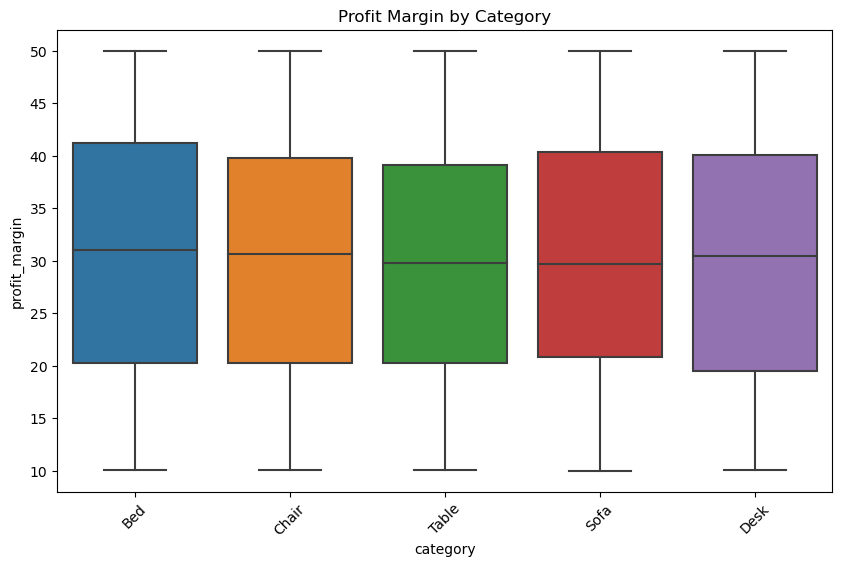

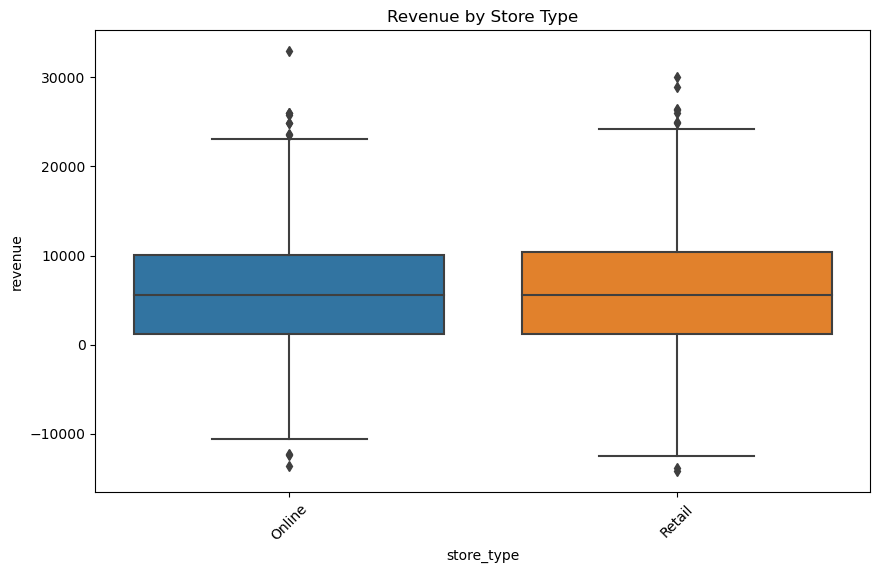

In [8]:
# Boxplots for Profit Margin across Category and Store Type

plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='profit_margin', data=df)
plt.xticks(rotation=45)
plt.title('Profit Margin by Category')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='store_type', y='revenue', data=df)
plt.xticks(rotation=45)
plt.title('Revenue by Store Type')
plt.show()

## Profit Margin by Category, Location, and Store Type
The boxenplot shows how profit margins vary not only by category but also by store location, revealing geographic trends.
The barplot visualizes the total revenue generated by category, split by store type, showing which categories perform better in different store types.

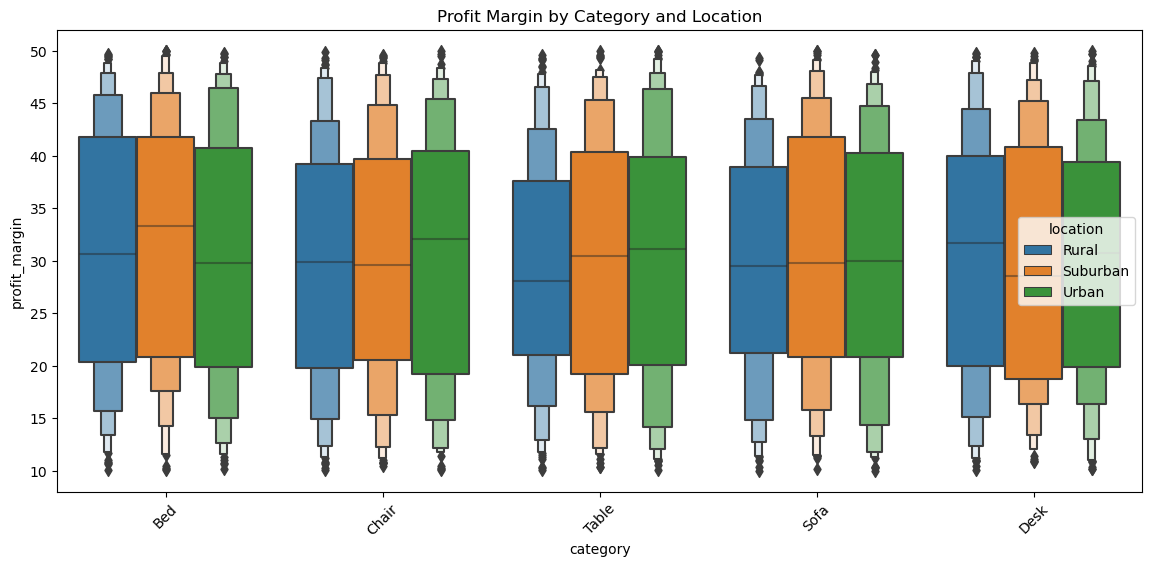

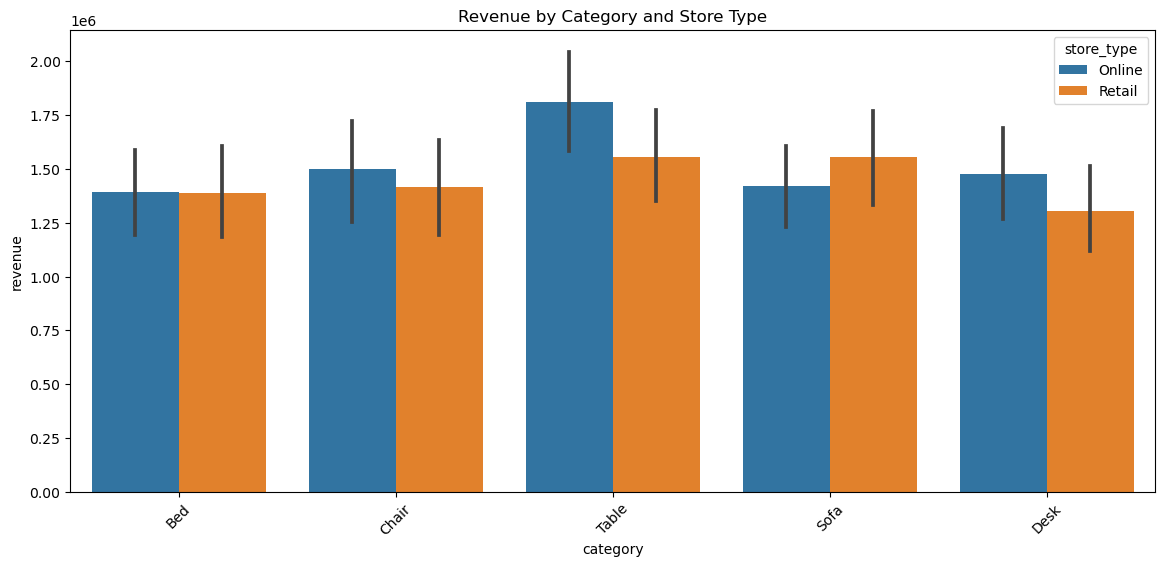

In [10]:

# Category vs Location and Store Type
plt.figure(figsize=(14,6))
sns.boxenplot(x='category', y='profit_margin', hue='location', data=df)
plt.xticks(rotation=45)
plt.title('Profit Margin by Category and Location')
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x='category', y='revenue', hue='store_type', data=df, estimator=sum)
plt.xticks(rotation=45)
plt.title('Revenue by Category and Store Type')
plt.show()

## Profit Margin by Category, Brand, and Season
The first barplot shows how profit margins differ across various brands within each category. This can help identify the most profitable brands.
The second barplot illustrates revenue across different seasons, allowing you to see seasonal trends in sales performance.

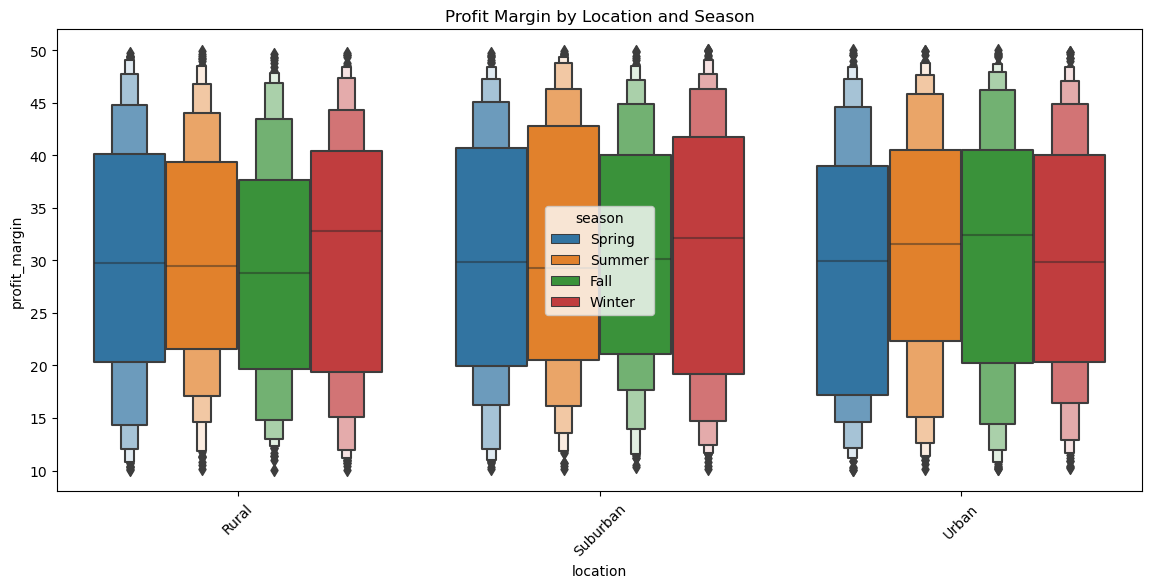

In [11]:
# Season vs Location
plt.figure(figsize=(14,6))
sns.boxenplot(x='location', y='profit_margin', hue='season', data=df)
plt.xticks(rotation=45)
plt.title('Profit Margin by Location and Season')
plt.show()


## Profit Margin by Category, Brand, and Season
These plots provide insight into which brands generate the highest profit margins within each category, and how seasonal sales affect revenue for each category.


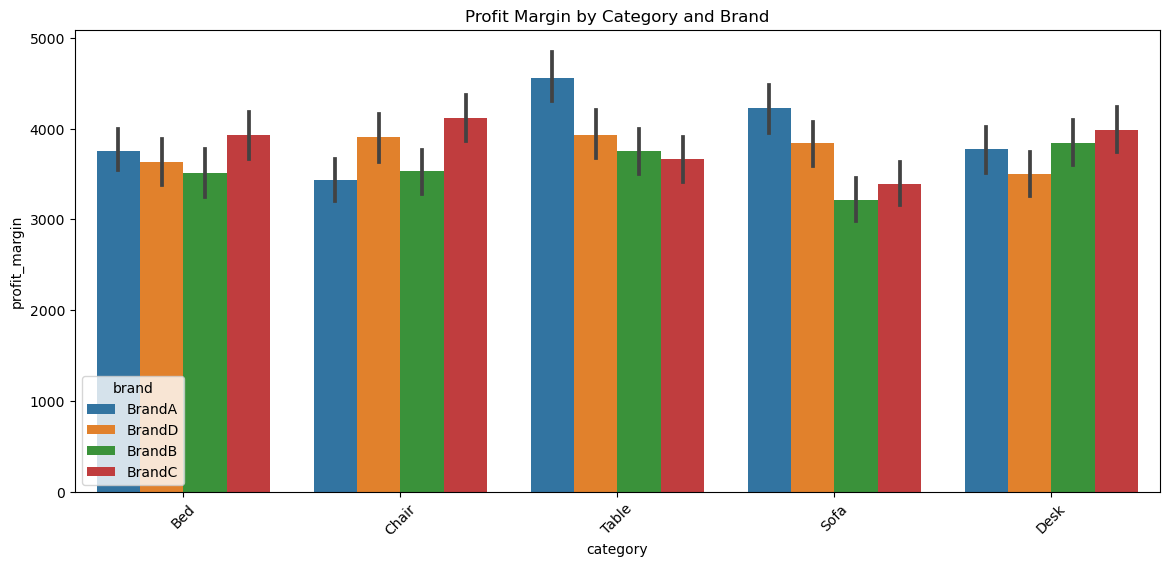

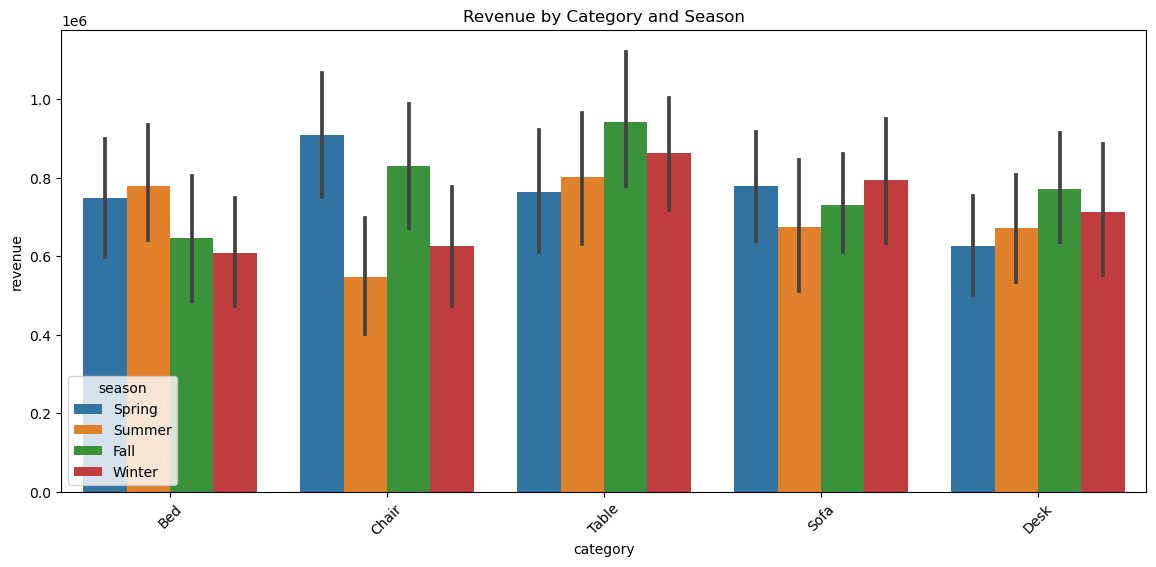

In [14]:
# Category vs Brand and Season
plt.figure(figsize=(14,6))
sns.barplot(x='category', y='profit_margin', hue='brand', data=df, estimator=sum)
plt.xticks(rotation=45)
plt.title('Profit Margin by Category and Brand')
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x='category', y='revenue', hue='season', data=df, estimator=sum)
plt.xticks(rotation=45)
plt.title('Revenue by Category and Season')
plt.show()

## Revenue Per Unit Across Store Types
This plot compares the revenue generated per unit sold across different store types (e.g., online vs. physical stores), offering insights into which store types are most efficient.

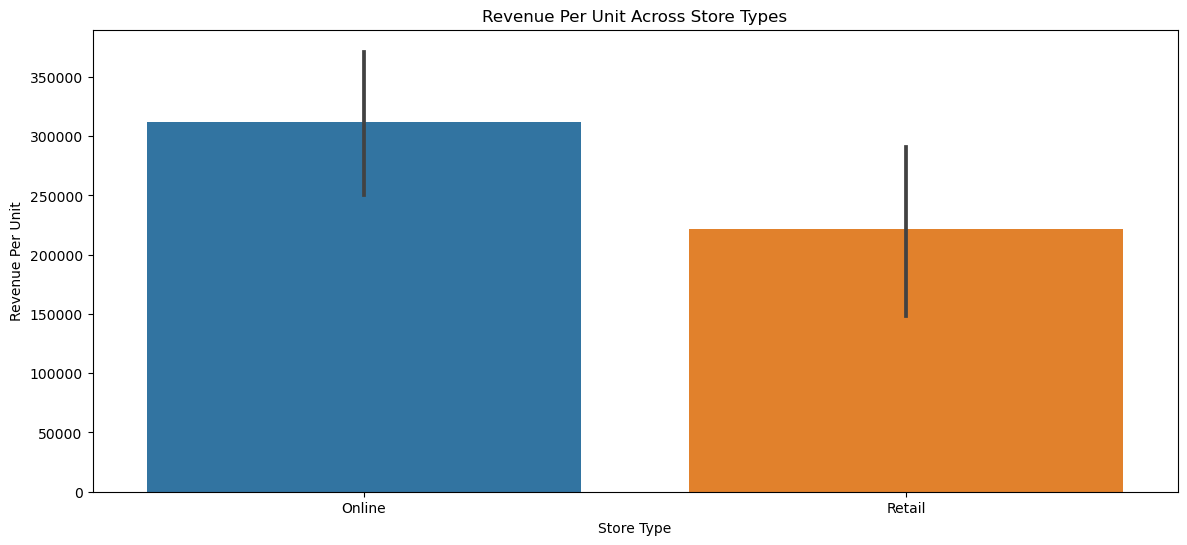

In [17]:
# Revenue Per Unit Across Store Types
plt.figure(figsize=(14,6))
sns.barplot(x='store_type', y='revenue_per_unit', data=df, estimator=sum)
plt.xlabel('Store Type')
plt.ylabel('Revenue Per Unit')
plt.title('Revenue Per Unit Across Store Types')
plt.show()

 ## Scatter Plot for Price Per Sale vs Profit
 The scatter plot shows the relationship between price per sale and profit, helping visualize if higher prices lead to greater profit or if there's a non-linear relationship.

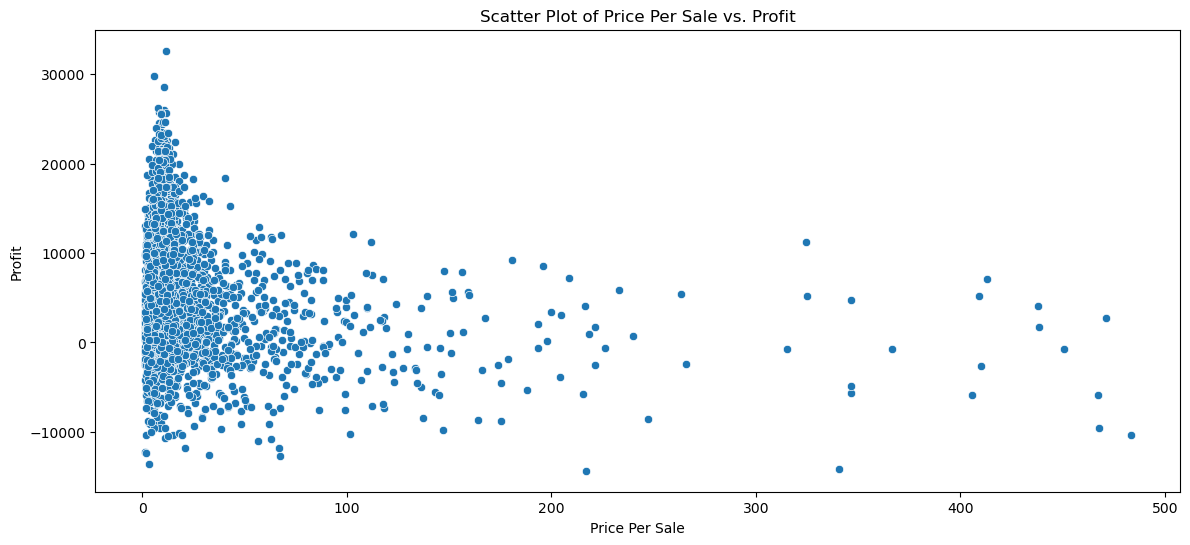

In [18]:
# Scatter Plot of Price Per Sale vs Profit
plt.figure(figsize=(14,6))
sns.scatterplot(x='price_per_sale', y='profit', data=df)
plt.xlabel('Price Per Sale')
plt.ylabel('Profit')
plt.title('Scatter Plot of Price Per Sale vs. Profit')
plt.show()

## Pairwise Relationships Between Numerical Columns

A pairplot shows the pairwise relationships between key numerical variables (price, sales, profit margin, revenue). This is useful for identifying correlations and patterns between different features.

<Figure size 800x600 with 0 Axes>

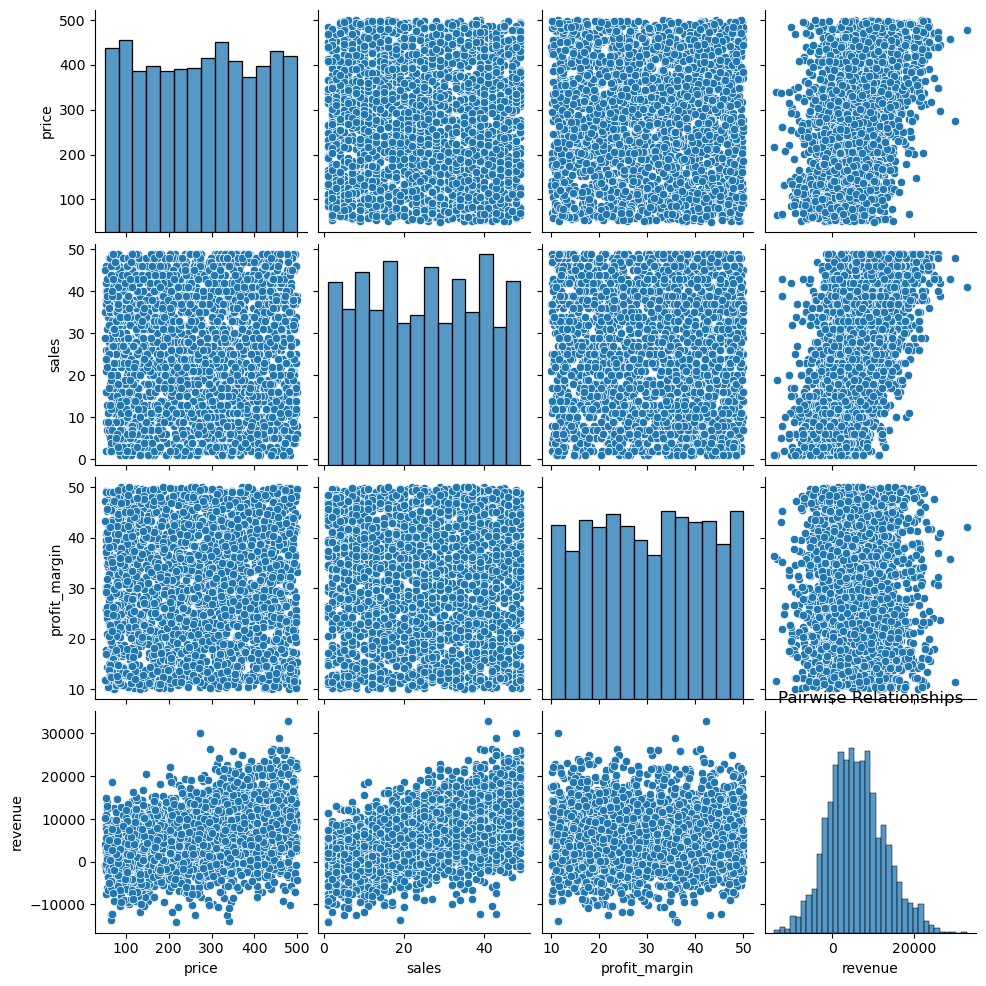

In [13]:
# Pairwise Relationships between Numerical Columns
plt.figure(figsize=(8,6))
sns.pairplot(df[['price', 'sales', 'profit_margin', 'revenue']])
plt.title('Pairwise Relationships')
plt.show()